# Workshop 5

#### Import

In [90]:
from sklearn.feature_extraction.text import TfidfVectorizer
import deepcut
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

# Missing Values and Outlier Analysis

In [91]:
# Load dataset
df = pd.read_csv('resource/anthems.csv')

# Display basic information
df.head()

Country Alpha-2 Alpha-3 Continent  \
0     Albania      AL     ALB    Europe   
1     Armenia      AM     ARM    Europe   
2     Austria      AT     AUT    Europe   
3  Azerbaijan      AZ     AZE    Europe   
4     Belarus      BY     BLR    Europe   

                                              Anthem  
0  Around our flag we stand united, With one wish...  
1  Our Fatherland, free, independent, That has fo...  
2  Land of mountains, land by the river, Land of ...  
3  Azerbaijan, Azerbaijan! The glorious Fatherlan...  
4  We, Belarusians, are peaceful people, Wholehea...

## Checking for Missing Values

In [92]:
# Count missing values per column
df.isnull().sum()

Country      0
Alpha-2      1
Alpha-3      0
Continent    0
Anthem       0
dtype: int64

## Unique Values Per Column

In [93]:
# Count unique values per column
df.nunique()

Country      190
Alpha-2      188
Alpha-3      190
Continent      6
Anthem       188
dtype: int64

## Text Length Distribution in Anthem Column

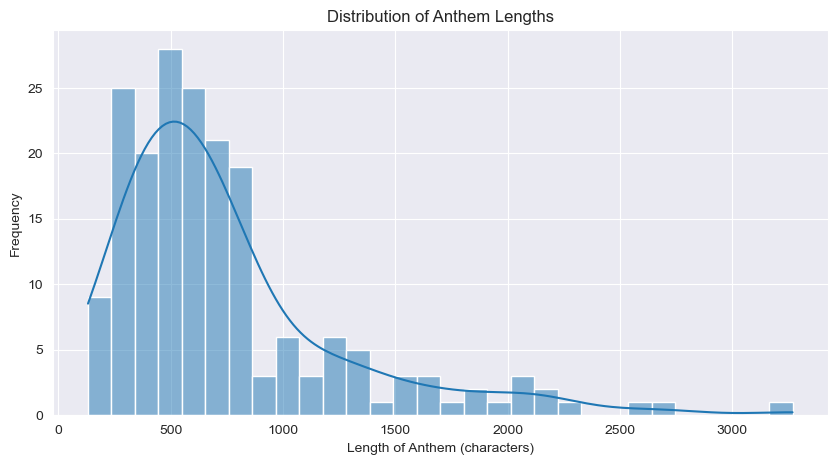

In [94]:
# Compute text lengths
df['Anthem_Length'] = df['Anthem'].str.len()

# Plot distribution
plt.figure(figsize=(10,5))
sns.histplot(df['Anthem_Length'], bins=30, kde=True)
plt.title('Distribution of Anthem Lengths')
plt.xlabel('Length of Anthem (characters)')
plt.ylabel('Frequency')
plt.show()

## Boxplot of Anthem Lengths

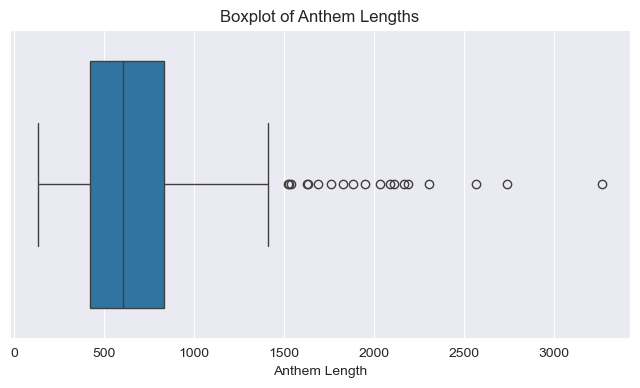

In [95]:
plt.figure(figsize=(8,4))
sns.boxplot(x=df['Anthem_Length'])
plt.title('Boxplot of Anthem Lengths')
plt.xlabel('Anthem Length')
plt.show()

## Perform EDA

Summary Statistics:
        Country Alpha-2 Alpha-3 Continent  \
count       190     189     190       190   
unique      190     188     190         6   
top     Albania      CH     ALB    Africa   
freq          1       2       1        56   
mean        NaN     NaN     NaN       NaN   
std         NaN     NaN     NaN       NaN   
min         NaN     NaN     NaN       NaN   
25%         NaN     NaN     NaN       NaN   
50%         NaN     NaN     NaN       NaN   
75%         NaN     NaN     NaN       NaN   
max         NaN     NaN     NaN       NaN   

                                                   Anthem  Anthem_Length  
count                                                 190     190.000000  
unique                                                188            NaN  
top     Arise, ye who refuse to be slaves; With our ve...            NaN  
freq                                                    2            NaN  
mean                                                  NaN     74

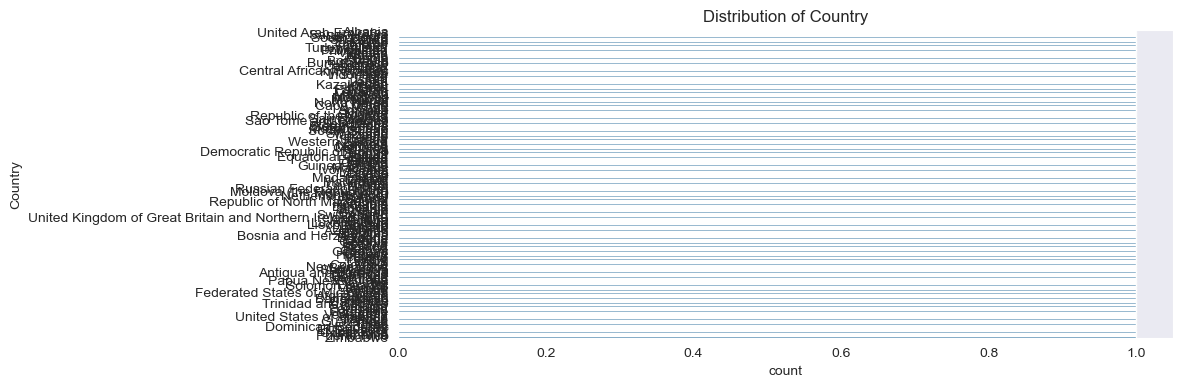

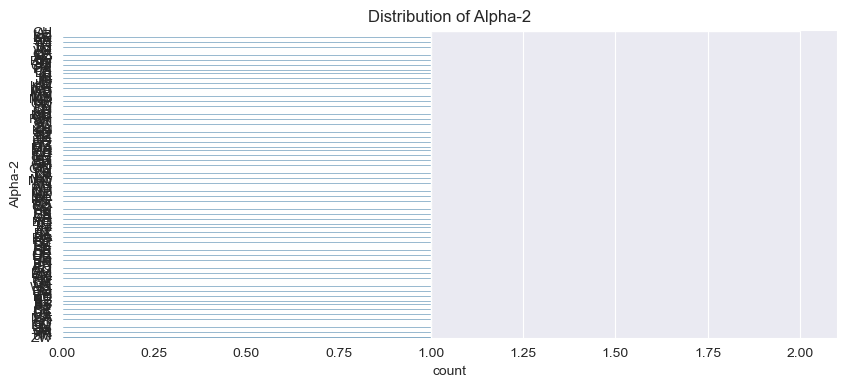

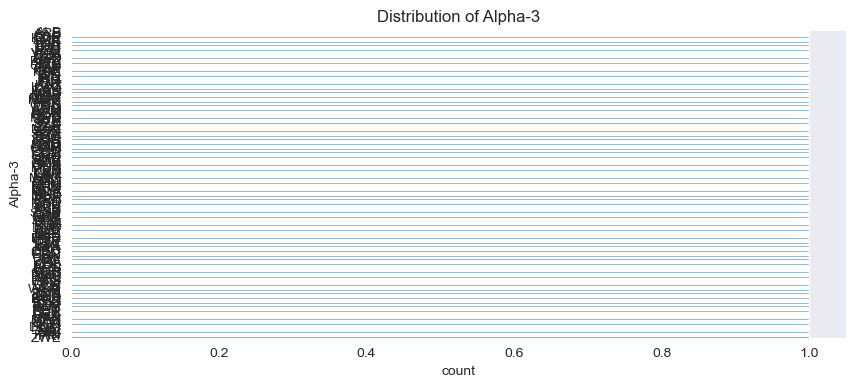

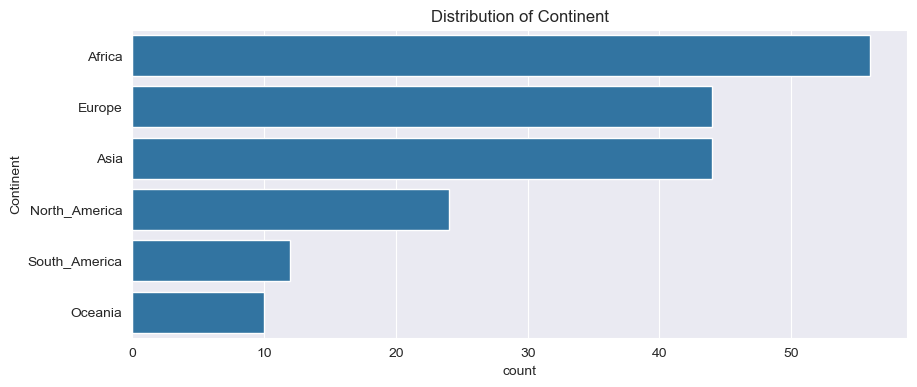

/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 157 (\x9d) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 129 (\x81) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


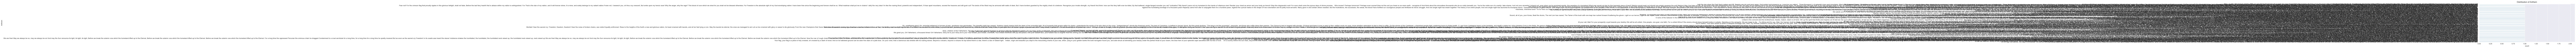

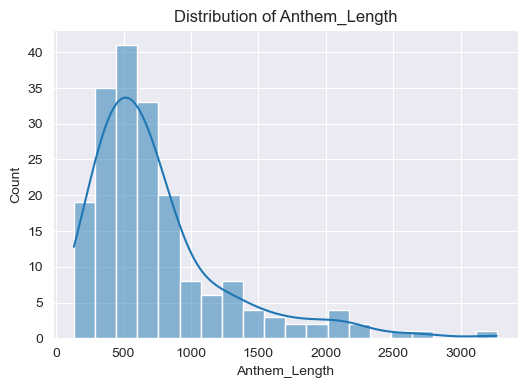

In [96]:
# Summary Statistics
print("Summary Statistics:")
print(df.describe(include='all'))

# Visualizing Distributions
import matplotlib.pyplot as plt
import seaborn as sns

# Identify categorical and numerical features
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
numerical_features = df.select_dtypes(include=['number']).columns.tolist()

# Plot categorical feature distributions
for col in categorical_features:
    plt.figure(figsize=(10,4))
    sns.countplot(y=df[col], order=df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.show()

# Plot numerical feature distributions
for col in numerical_features:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f'Distribution of {col}')
    plt.show()

## Translate into your local language e.g. Thai, Chinese)

In [97]:
df_tran = pd.DataFrame(df, columns=["Country", "Anthem"])

In [98]:
from deep_translator import GoogleTranslator

thai_translated = df['Anthem'].apply(lambda x: GoogleTranslator(source='en', target='th').translate(x))

print(thai_translated)

0      เราสามัคคีกันยืนหยัดอยู่รอบธงของเรา ด้วยความปร...
1      ปิตุภูมิของเรา อิสระและเป็นอิสระ ซึ่งดำรงอยู่ม...
2      ดินแดนแห่งขุนเขา ดินแดนริมแม่น้ำ ดินแดนแห่งทุ่...
3      อาเซอร์ไบจาน อาเซอร์ไบจาน! ปิตุภูมิอันรุ่งโรจน...
4      พวกเราชาวเบลารุสเป็นคนรักสันติและทุ่มเทให้กับม...
                             ...                        
185    โอ้ผู้ปกป้องบ้านเกิดเมืองนอน! รวมตัวกันเพื่อสง...
186    โอ้ ยูกันดา ขอพระเจ้าทรงค้ำจุนท่าน เราฝากอนาคต...
187    โอ้ลูกหลานของซาฮารา! ในสนามรบ พวกเจ้าเป็นผู้ถื...
188    ยืนขึ้นและร้องเพลงเกี่ยวกับแซมเบีย ดินแดนแห่งค...
189    โอ้ โปรดชูธงขึ้นสูง ธงซิมบับเว สัญลักษณ์แห่งอิ...
Name: Anthem, Length: 190, dtype: object


In [99]:
df_tran['translated_anthem'] = thai_translated
df_tran['tokens'] = thai_translated.apply(lambda x: ' '.join(deepcut.tokenize(x)))

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
30/30 ━━━━━━━━━━━━━━━━━━━━ 

In [100]:
tfidf = TfidfVectorizer()

tfidf_matrix = tfidf.fit_transform(df_tran['tokens'])
tfidf_thai_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())

print(tfidf_thai_df)

      20  amjad  and  awice  ayia  bouill  capotillo  castile  cipe  ciuszko  \
0    0.0    0.0  0.0    0.0   0.0     0.0        0.0      0.0   0.0      0.0   
1    0.0    0.0  0.0    0.0   0.0     0.0        0.0      0.0   0.0      0.0   
2    0.0    0.0  0.0    0.0   0.0     0.0        0.0      0.0   0.0      0.0   
3    0.0    0.0  0.0    0.0   0.0     0.0        0.0      0.0   0.0      0.0   
4    0.0    0.0  0.0    0.0   0.0     0.0        0.0      0.0   0.0      0.0   
..   ...    ...  ...    ...   ...     ...        ...      ...   ...      ...   
185  0.0    0.0  0.0    0.0   0.0     0.0        0.0      0.0   0.0      0.0   
186  0.0    0.0  0.0    0.0   0.0     0.0        0.0      0.0   0.0      0.0   
187  0.0    0.0  0.0    0.0   0.0     0.0        0.0      0.0   0.0      0.0   
188  0.0    0.0  0.0    0.0   0.0     0.0        0.0      0.0   0.0      0.0   
189  0.0    0.0  0.0    0.0   0.0     0.0        0.0      0.0   0.0      0.0   

     ...       ไหล  ไหลร  ไหลเว  ไหว   

In [101]:
df_tran.to_csv('resource/anthems_translated.csv', index=False)

## Scaling using standard scalar

In [102]:
# Standardize the dataset
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.select_dtypes(include=['number']))

##  Modeling with K-Means and Hierarchical Clustering

In [103]:
# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['KMeans_Cluster'] = kmeans.fit_predict(df_scaled)

# Apply Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=3)
df['Hierarchical_Cluster'] = hierarchical.fit_predict(df_scaled)

df.head()

Country Alpha-2 Alpha-3 Continent  \
0     Albania      AL     ALB    Europe   
1     Armenia      AM     ARM    Europe   
2     Austria      AT     AUT    Europe   
3  Azerbaijan      AZ     AZE    Europe   
4     Belarus      BY     BLR    Europe   

                                              Anthem  Anthem_Length  \
0  Around our flag we stand united, With one wish...            794   
1  Our Fatherland, free, independent, That has fo...            468   
2  Land of mountains, land by the river, Land of ...            613   
3  Azerbaijan, Azerbaijan! The glorious Fatherlan...            818   
4  We, Belarusians, are peaceful people, Wholehea...            805   

   KMeans_Cluster  Hierarchical_Cluster  
0               1                     1  
1               0                     2  
2               0                     2  
3               1                     1  
4               1                     1

## Finding the Optimal Number of Clusters

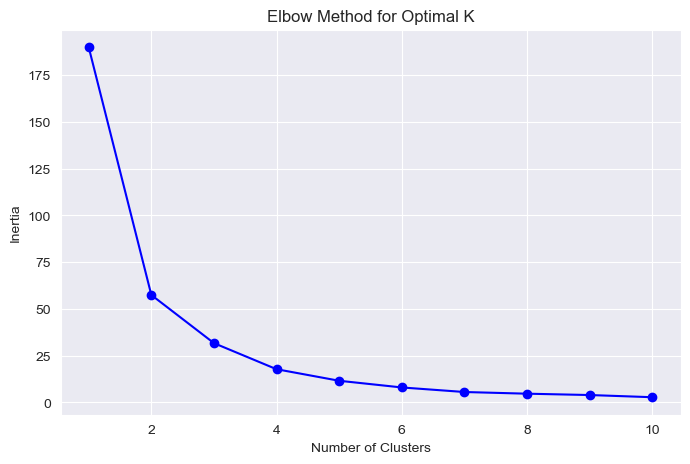

{2: 0.7197291921603407,
 3: 0.5800670360692882,
 4: 0.5672647177927178,
 5: 0.5703351054956953,
 6: 0.5690167084375908,
 7: 0.5735459274332716,
 8: 0.5731130479771058,
 9: 0.5245102037957626,
 10: 0.5361551411418036}

In [104]:
# Elbow Method
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

# Silhouette Score
silhouette_scores = {}
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df_scaled)
    silhouette_scores[k] = silhouette_score(df_scaled, labels)

silhouette_scores


## Discussion of Findings

- K-Means efficiently clusters data but requires predefining k, whereas hierarchical clustering provides a dendrogram to visualize cluster relationships.
- The Elbow Method helps determine the best k by identifying when inertia decreases at a slower rate.
- The Silhouette Score indicates how well-defined clusters are.